In [1]:
#입력값에 가중치 곱하는
import numpy as np

X = np.array([1,2])
W = np.array([0.5, 0.6])
X*W


array([0.5, 1.2])

In [2]:
np.sum(X*W), np.dot(X,W)

(1.7, 1.7)

In [3]:
#2개의 층으로 이루어진 퍼셉트론의 계산
x = np.array([1,2])
W = np.array([[1,2,3], [4,5,6]])
A = np.dot(X,W)
print('A =', A)

A = [ 9 12 15]


In [4]:
#and or 회로를 퍼셉트론으로 만들기
import numpy as np

def activation(s):
    if s > 0: return 1
    else: return -1

def perceptron(x1, x2):
    x = np.array([x1, x2])
    tmp = np.sum(W*x) + b
    return activation(tmp)

In [5]:
print('--- 퍼셉트론으로 구현한 AND 회로 ---')
W = np.array([0.5, 0.5])
b = -0.7
for x1, x2 in [(-1,-1), (-1,1), (1,-1), (1,1)]:
    y = perceptron(x1, x2)
    print('{:3d} {:3d} : {:3d}'.format(x1, x2, y))

--- 퍼셉트론으로 구현한 AND 회로 ---
 -1  -1 :  -1
 -1   1 :  -1
  1  -1 :  -1
  1   1 :   1


In [6]:
W = np.array([0.5, 0.5])
b = 0.7
print('---퍼셉트론으로 구현한 OR 회로 ---')
for x1, x2 in [(-1, -1), (-1, 1), (1, -1), (1,1)]:
    y = perceptron(x1, x2)
    print('{:3d} {:3d} : {:3d}'.format(x1,x2,y))

---퍼셉트론으로 구현한 OR 회로 ---
 -1  -1 :  -1
 -1   1 :   1
  1  -1 :   1
  1   1 :   1


In [7]:
#퍼셉트론 학습
import numpy as np

def activation(s):
    if s > 0: return 1
    else: return -1
    
def out(x):
    return activation(W.dot(x))

In [8]:
def train(X, Y, epochs=10):
    global W, learning_rate
    for t in range(epochs):
        print('epoch= ', t, '\n====================')
        ajusted = 0
        for i in range(len(X)):
            Y_hat = out(X[i])
            error = Y[i] - Y_hat
            if error != 0 : ajusted += 1
            W += learning_rate * error * X[i]
            print('입력:', X[i], '정답:', Y[i], '출력:', Y_hat, '변경된 가중치:', W, 'error:', error)
            
        if ajusted == 0: return

In [9]:
X = np.array([[-1, -1, 1],
             [-1, 1, 1],
             [1, -1, 1],
             [1, 1, 1]])
Y = np.array([-1, -1, -1, 1])
W = np.array([0,0,0], dtype=np.float64)
learning_rate = 0.1
train(X,Y,100)

epoch=  0 
입력: [-1 -1  1] 정답: -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0
입력: [-1  1  1] 정답: -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0
입력: [ 1 -1  1] 정답: -1 출력: -1 변경된 가중치: [0. 0. 0.] error: 0
입력: [1 1 1] 정답: 1 출력: -1 변경된 가중치: [0.2 0.2 0.2] error: 2
epoch=  1 
입력: [-1 -1  1] 정답: -1 출력: -1 변경된 가중치: [0.2 0.2 0.2] error: 0
입력: [-1  1  1] 정답: -1 출력: 1 변경된 가중치: [0.4 0.  0. ] error: -2
입력: [ 1 -1  1] 정답: -1 출력: 1 변경된 가중치: [ 0.2  0.2 -0.2] error: -2
입력: [1 1 1] 정답: 1 출력: 1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
epoch=  2 
입력: [-1 -1  1] 정답: -1 출력: -1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
입력: [-1  1  1] 정답: -1 출력: -1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
입력: [ 1 -1  1] 정답: -1 출력: -1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0
입력: [1 1 1] 정답: 1 출력: 1 변경된 가중치: [ 0.2  0.2 -0.2] error: 0


In [10]:
def predict(X, circuit):
    print('퍼셉트론의 예측 결과({} 회로)\nx0 x1 y'.format(circuit))
    for x in X:
        print('{:2d} {:3d} {:3d}'.format(x[0], x[1], out(x)))
    
predict(X, 'AND')

퍼셉트론의 예측 결과(AND 회로)
x0 x1 y
-1  -1  -1
-1   1  -1
 1  -1  -1
 1   1   1


In [11]:
#XOR은 안됨. 다중 퍼셉트론으로 XOR 연산
import numpy as np

w1 = np.array([.5, .5])
w2 = np.array([.5, .5])
b1, b2 = -0.7, 0.7

def activation(s):
    if s > 0: return 1
    else: return -1

def perceptron(x, w, b):
    y = np.sum(w*x) + b
    return activation(y)

In [12]:
def AND(x1, x2):
    return perceptron(np.array([x1, x2]), w1, b1)

def NAND(x1, x2):
    return perceptron(np.array([x1, x2]), -w1, -b1)

def OR(x1, x2):
    return perceptron(np.array([x1, x2]), w2, b2)

def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

In [13]:
print('--- 다층 퍼셉트론으로 구현한 XOR 회로---')
for x in [(-1, -1), (1, -1), (-1, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print('{:2d} {:3d} : {:3d}'.format(x[0], x[1], y))

--- 다층 퍼셉트론으로 구현한 XOR 회로---
-1  -1 :  -1
 1  -1 :   1
-1   1 :   1
 1   1 :  -1


IRIS 데이터 분류에 딥러닝 적용

In [14]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.20)
print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태: ', y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태: ', y_test.shape)

훈련용 데이터의 형태: (120, 4)
훈련용 데이터의 레이블 형태:  (120,)
테스트용 데이터의 형태: (30, 4)
테스트용 데이터의 레이블 형태:  (30,)


In [16]:
from tensorflow import keras

model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [17]:
#모델 컴파일
model.compile(optimizer ='adam', \
    loss = 'sparse_categorical_crossentropy', \
        metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
24/24 - 0s - loss: 1.4248 - accuracy: 0.1917 - 261ms/epoch - 11ms/step
Epoch 2/30
24/24 - 0s - loss: 1.0723 - accuracy: 0.3667 - 11ms/epoch - 445us/step
Epoch 3/30
24/24 - 0s - loss: 0.9253 - accuracy: 0.6500 - 10ms/epoch - 429us/step
Epoch 4/30
24/24 - 0s - loss: 0.8069 - accuracy: 0.6917 - 10ms/epoch - 411us/step
Epoch 5/30
24/24 - 0s - loss: 0.7231 - accuracy: 0.6917 - 10ms/epoch - 413us/step
Epoch 6/30
24/24 - 0s - loss: 0.6624 - accuracy: 0.6917 - 11ms/epoch - 455us/step
Epoch 7/30
24/24 - 0s - loss: 0.6141 - accuracy: 0.6917 - 11ms/epoch - 449us/step
Epoch 8/30
24/24 - 0s - loss: 0.5809 - accuracy: 0.7000 - 10ms/epoch - 412us/step
Epoch 9/30
24/24 - 0s - loss: 0.5427 - accuracy: 0.7667 - 11ms/epoch - 458us/step
Epoch 10/30
24/24 - 0s - loss: 0.5135 - accuracy: 0.7833 - 10ms/epoch - 416us/step
Epoch 11/30
24/24 - 0s - loss: 0.4976 - accuracy: 0.7083 - 10ms/epoch - 414us/step
Epoch 12/30
24/24 - 0s - loss: 0.4855 - accuracy: 0.8917 - 10ms/epoch - 433us/step
Epoch 13/30
2

In [18]:
#신경망 학습 결과
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도: ', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 86ms/step - loss: 0.2467 - accuracy: 1.0000
붓꽃 데이터의 분류 정확도:  1.0


In [24]:
#성능 향상을 위해 층을 추가
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'), # 새롭게 추가한 층층
    keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붗꽃 데이터의 분류 정확도: ', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 60ms/step - loss: 0.0613 - accuracy: 0.9667
붗꽃 데이터의 분류 정확도:  0.9666666388511658


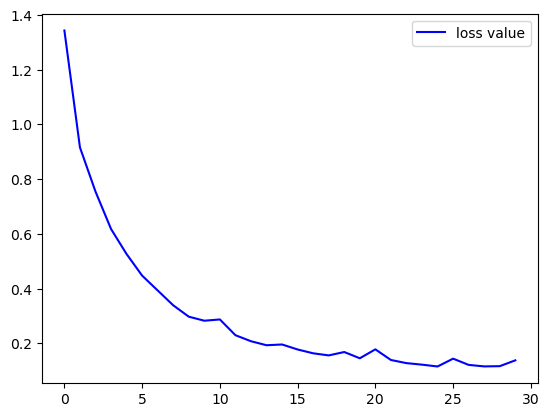

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

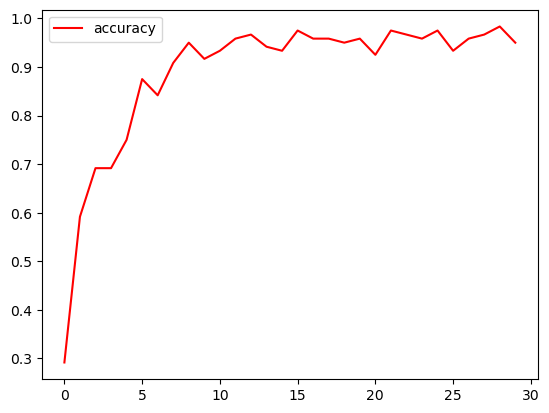

In [26]:
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

In [28]:
model.save('./iris_60x30_model.h5')

In [29]:
loaded = keras.models.load_model('./iris_60x30_model.h5')
loaded.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 4)                 0         
                                                                 
 dense_14 (Dense)            (None, 60)                300       
                                                                 
 dense_15 (Dense)            (None, 30)                1830      
                                                                 
 dense_16 (Dense)            (None, 3)                 93        
                                                                 
Total params: 2,223
Trainable params: 2,223
Non-trainable params: 0
_________________________________________________________________
